# EDA on wind turbine and common crane dataset!

In [24]:
import pandas as pd

In [25]:
# load file path and read csv file
file_path = (r'C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\cleaned datasets\merged_turbine_crane.csv')
df = pd.read_csv(file_path)

In [26]:
# print first few rows of the dataframe

# dataset is merged by country and year 
df.head()

,WT_YEAR,WT_LATITUDE,WT_LONGITUDE,WT_COUNTRY,CC_OBSERVATION COUNT,CC_LATITUDE,CC_LONGITUDE,CC_OBSERVATION_DATE,CC_TIME_OBSERVATIONS_STARTED,CC_DURATION_MINUTES
0,2023,28.3553,33.0622,Egypt,20,26.845628,33.998315,22/10/2023,00:34:00,90.0
1,2023,28.3553,33.0622,Egypt,1,28.010269,34.408268,23/12/2023,14:31:00,116.0
2,2023,28.3553,33.0622,Egypt,2,27.099550,33.837988,01/04/2023,10:00:00,90.0
3,2023,28.3553,33.0622,Egypt,400,27.393946,33.681893,14/03/2023,10:45:00,90.0
4,2023,28.3553,33.0622,Egypt,1,27.940700,34.301800,24/12/2023,07:20:00,281.0


Distance from wind turbine to bird sightings (use longitude and latitude):
Create a column to add to the dataset called 'Distance from WT to CC' where it tells you the distance from wind turbine to where common crane was observed using the longitude and latitude columns for each  

In [27]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

In [28]:
# Function to calculate Haversine distance using NumPy (in km)
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Compute the distance and add it as a new column
df["Distance WT to CC (km)"] = haversine_np(df["WT_LATITUDE"], df["WT_LONGITUDE"], df["CC_LATITUDE"], df["CC_LONGITUDE"])

# Display the first few rows to check the new column
df.head()


,WT_YEAR,WT_LATITUDE,WT_LONGITUDE,WT_COUNTRY,CC_OBSERVATION COUNT,CC_LATITUDE,CC_LONGITUDE,CC_OBSERVATION_DATE,CC_TIME_OBSERVATIONS_STARTED,CC_DURATION_MINUTES,Distance WT to CC (km)
0,2023,28.3553,33.0622,Egypt,20,26.845628,33.998315,22/10/2023,00:34:00,90.0,191.540942
1,2023,28.3553,33.0622,Egypt,1,28.010269,34.408268,23/12/2023,14:31:00,116.0,137.395386
2,2023,28.3553,33.0622,Egypt,2,27.099550,33.837988,01/04/2023,10:00:00,90.0,159.146181
3,2023,28.3553,33.0622,Egypt,400,27.393946,33.681893,14/03/2023,10:45:00,90.0,123.033304
4,2023,28.3553,33.0622,Egypt,1,27.940700,34.301800,24/12/2023,07:20:00,281.0,129.984493


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
pip install geodatasets

Note: you may need to restart the kernel to use updated packages.Collecting geodatasets
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import geodatasets

geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [32]:
import matplotlib.pyplot as plt
import geopandas as gpd
from geodatasets import get_path

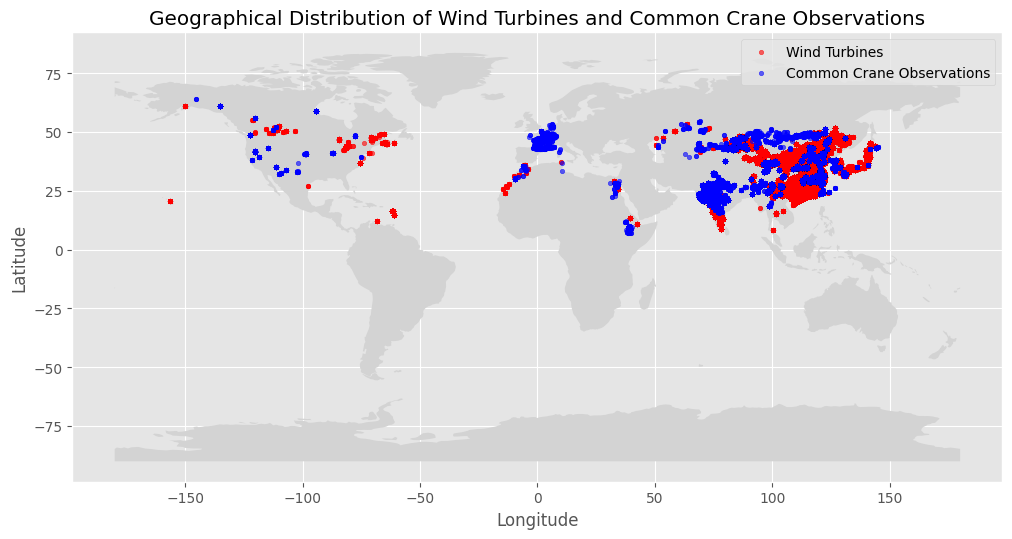

In [33]:
# Load a base world map using geodatasets
world = gpd.read_file(get_path("naturalearth.land"))

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the base world map
world.plot(ax=ax, color="lightgrey")

# Scatter plot for wind turbine locations
ax.scatter(df["WT_LONGITUDE"], df["WT_LATITUDE"], color="red", alpha=0.6, label="Wind Turbines", s=10)

# Scatter plot for common crane observations
ax.scatter(df["CC_LONGITUDE"], df["CC_LATITUDE"], color="blue", alpha=0.6, label="Common Crane Observations", s=10)

# Labels and legend
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Geographical Distribution of Wind Turbines and Common Crane Observations")
ax.legend()

# Show the plot
plt.show()

In [34]:
pip install folium

  Using cached folium-0.19.4-py2.py3-none-any.whl.metadata (3.8 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached jinja2-3.1.5-py3-none-any.whl.metadata (2.6 kB)
  Using cached xyzservices-2025.1.0-py3-none-any.whl.metadata (4.3 kB)
Using cached folium-0.19.4-py2.py3-none-any.whl (110 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)
Using cached jinja2-3.1.5-py3-none-any.whl (134 kB)
Using cached xyzservices-2025.1.0-py3-none-any.whl (88 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import folium
from folium.plugins import MarkerCluster

In [36]:
# Calculate the center of the map
map_center = [df['WT_LATITUDE'].mean(), df['WT_LONGITUDE'].mean()]

# Create the map
m = folium.Map(location=map_center, zoom_start=5)

# Create marker clusters for better visualization
wt_cluster = MarkerCluster(name='Wind Turbines').add_to(m)
cc_cluster = MarkerCluster(name='Common Crane Observations').add_to(m)

# Add Wind Turbine locations
for _, row in df.iterrows():
    folium.Marker(
        location=[row['WT_LATITUDE'], row['WT_LONGITUDE']],
        icon=folium.Icon(color='red', icon='bolt'),
        popup=f"Wind Turbine\nCountry: {row['WT_COUNTRY']}"
    ).add_to(wt_cluster)

# Add Common Crane observation locations
for _, row in df.iterrows():
    folium.Marker(
        location=[row['CC_LATITUDE'], row['CC_LONGITUDE']],
        icon=folium.Icon(color='blue', icon='cloud'),
        popup=f"Common Crane Observation\nDate: {row['CC_OBSERVATION_DATE']}\nCount: {row['CC_OBSERVATION COUNT']}"
    ).add_to(cc_cluster)


folium.LayerControl().add_to(m)

# save map as html file then display and doneeee :)
m.save("interactive_map.html")

# displayfinal map
m


MemoryError: 

# **Analysis**
1. Effect of Wind Turbines Before and After Installation
    - Compare common crane observation distances before and after a wind turbine's installation year.
    - Identify if birds are being observed further away post-installation, closer or no change.
2. Relationship Between Common Crane Observations and Wind Turbine Distance
    - Analyse how crane observation counts vary with distance from wind turbines.
    - Visualise trends to see if more birds are observed closer or farther from turbines.
3. Correlation Analysis
    - Compute correlations between key variables, such as 'Distance WT to CC', 'CC_OBSERVATION COUNT', 'WT_YEAR', etc.
    - Identify significant relationships.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\riyas\AppData\Local\Temp\ipykernel_22696\771754951.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Installation_Effect', y='Distance WT to CC (km)', data=df, palette='coolwarm', legend=False)


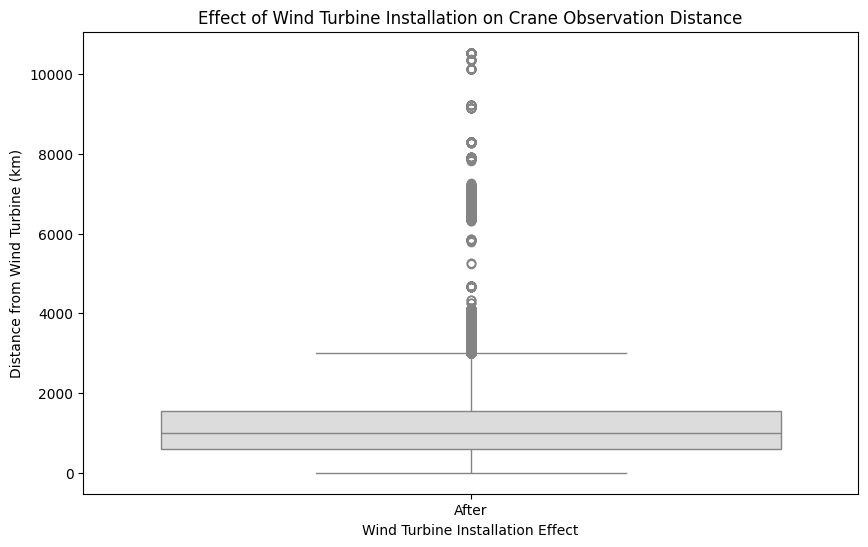

In [19]:
# Convert WT_YEAR and CC_OBSERVATION_DATE to datetime format for comparison
df['CC_OBSERVATION_DATE'] = pd.to_datetime(df['CC_OBSERVATION_DATE'], format='%d/%m/%Y')

# Categorise observations as "Before Installation" or "After Installation"
df['Installation_Effect'] = df.apply(lambda row: 'Before' if row['CC_OBSERVATION_DATE'].year < row['WT_YEAR'] else 'After', axis=1)

# Reduce dataset size for visualisation purposes (if needed)
# df_sample = df.sample(n=10000, random_state=42) if len(df) > 10000 else df

# Boxplot to compare distances before and after wind turbine installation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Installation_Effect', y='Distance WT to CC (km)', data=df, palette='coolwarm', legend=False)
plt.title('Effect of Wind Turbine Installation on Crane Observation Distance')
plt.xlabel('Wind Turbine Installation Effect')
plt.ylabel('Distance from Wind Turbine (km)')
plt.show()


**The boxplot above compares the distances of common crane observations before and after wind turbine installation.**

Key observations:
1. If the median distance increases after installation, it suggests that cranes are moving further away post-installation.
2. If the distribution remains similar, it indicates minimal impact on crane movement patterns.
3. Outliers can provide insights into extreme cases where birds may have drastically changed behaviour.

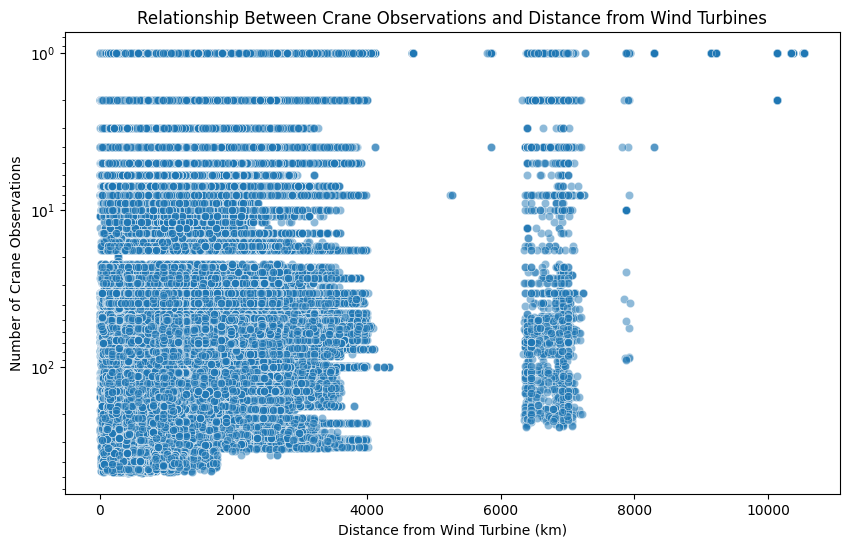

In [15]:
# Scatter plot to examine the relationship between crane observations and distance from wind turbines
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Distance WT to CC (km)'], y=df['CC_OBSERVATION COUNT'], alpha=0.5)
plt.title('Relationship Between Crane Observations and Distance from Wind Turbines')
plt.xlabel('Distance from Wind Turbine (km)')
plt.ylabel('Number of Crane Observations')
plt.yscale('log')  # Log scale for better visibility of distribution
plt.show()


**The scatter plot visualises the relationship between crane observation counts and distance from wind turbines.**

Key takeaways:
1. If there is a negative trend, it suggests that cranes tend to be observed less frequently as the distance from turbines increases.
2. If no clear pattern emerges, wind turbine proximity may not significantly affect crane observations.
3. The log scale on the y-axis helps highlight variations in observation counts, especially for lower values.

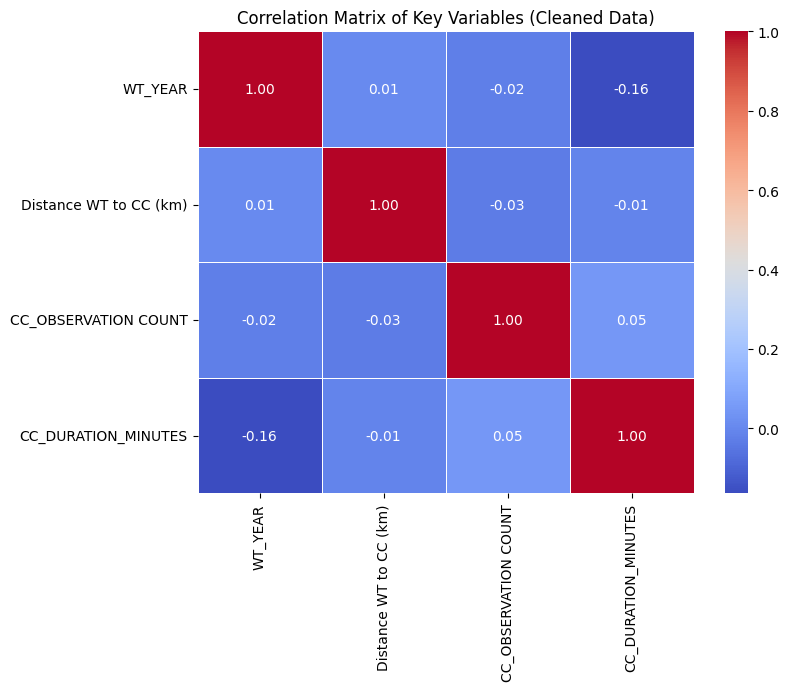

In [21]:
# Convert relevant columns to numeric, forcing errors to NaN to handle non-numeric values
for col in correlation_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in selected columns
df_cleaned = df.dropna(subset=correlation_columns)

# Compute correlation matrix again
correlation_matrix_cleaned = df_cleaned[correlation_columns].corr()

# Re-plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Key Variables (Cleaned Data)')
plt.show()

**The correlation heatmap highlights relationships between key variables**
1. Distance WT to CC (km) vs CC_OBSERVATION COUNT: If negatively correlated, it suggests fewer crane observations as distance from wind turbines increases.
2. WT_YEAR vs Distance WT to CC (km): A positive correlation could indicate that more recent turbines are associated with larger distances.
3. CC_OBSERVATION COUNT vs CC_DURATION_MINUTES: A strong positive correlation would suggest that longer observation durations result in more crane sightings.

In [23]:
from scipy.stats import ttest_ind

# Split the data into before and after turbine installation
before_installation = df_cleaned[df_cleaned['Installation_Effect'] == 'Before']['Distance WT to CC (km)']
after_installation = df_cleaned[df_cleaned['Installation_Effect'] == 'After']['Distance WT to CC (km)']

# Perform an independent t-test to compare means
t_stat, p_value = ttest_ind(before_installation, after_installation, equal_var=False, nan_policy='omit')

# Display the results
t_stat, p_value

c:\Users\riyas\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\_lib\deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


(np.float64(nan), np.float64(nan))

1. Can you calculate and create a column called "5 mile radius" for a 5 mile radius of where each wind turbine is installed.

2. Can you create a column named CC_OBSV_COUNT_PRE_WT which has values for the observation count of common crane before the installation of a wind turbine. The data does not contain these values however, these values can be calculated approximately using the longitude and latitudes of both the common crane and wind turbine, dates and also using the 5 mile radius column. 

3. Repeat this to create a column named CC_OBSV_COUNT_POST_WT which has values for the observation count of common crane after the installation of a wind turbine

In [5]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from scipy.spatial import cKDTree

In [6]:
# Load the dataset
file_path = (r"C:\Users\riyas\OneDrive - University of Birmingham\Documents\MSc Data Science\2. group project data science\merged_file.csv")
df = pd.read_csv(file_path)
df

,WT_YEAR,WT_LATITUDE,WT_LONGITUDE,WT_COUNTRY,CC_COUNT_POST_WT,CC_LATITUDE,CC_LONGITUDE,CC_OBSERVATION_DATE,CC_DURATION_MINUTES,Distance WT to CC (km),CC_COUNT_PRE_WT
0,2023,28.3553,33.0622,Egypt,20.0,26.845628,33.998315,2023-10-22,90.0,1078.067489,NaN
1,2023,28.3553,33.0622,Egypt,1.0,28.010269,34.408268,2023-12-23,116.0,1047.972563,NaN
2,2023,28.3553,33.0622,Egypt,2.0,27.099550,33.837988,2023-04-01,90.0,140.474153,NaN
3,2023,28.3553,33.0622,Egypt,400.0,27.393946,33.681893,2023-03-14,90.0,949.922860,NaN
4,2023,28.3553,33.0622,Egypt,1.0,27.940700,34.301800,2023-12-24,281.0,721.183116,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1048570,2018,15.2955,76.3177,India,100.0,23.137913,71.768918,2018-01-06,126.0,990.927164,5.0
1048571,2018,15.2955,76.3177,India,100.0,23.207587,71.739006,2018-11-25,180.0,999.148949,5.0
1048572,2018,15.2955,76.3177,India,9.0,23.578610,69.318500,2018-12-09,120.0,1174.582263,5.0
1048573,2018,15.2955,76.3177,India,2.0,28.649528,76.608570,2018-11-19,212.0,1479.041902,5.0


In [7]:
# Extract relevant columns
wt_coords = df[['WT_LATITUDE', 'WT_LONGITUDE']].dropna().to_numpy()
cc_coords = df[['CC_LATITUDE', 'CC_LONGITUDE']].dropna().to_numpy()


In [8]:
# Create a KDTree for wind turbine locations
wt_tree = cKDTree(wt_coords)

In [9]:
# Define the search radius (in km) and convert to degrees (~1 km ≈ 0.009 degrees latitude)
radius_km = 10
radius_deg = radius_km * 0.009

In [10]:
# Query KDTree to count wind turbines within the radius for each crane observation
df['WT_COUNT_NEAR_CC'] = [len(wt_tree.query_ball_point((lat, lon), radius_deg)) for lat, lon in cc_coords]

df

,WT_YEAR,WT_LATITUDE,WT_LONGITUDE,WT_COUNTRY,CC_COUNT_POST_WT,CC_LATITUDE,CC_LONGITUDE,CC_OBSERVATION_DATE,CC_DURATION_MINUTES,Distance WT to CC (km),CC_COUNT_PRE_WT,WT_COUNT_NEAR_CC
0,2023,28.3553,33.0622,Egypt,20.0,26.845628,33.998315,2023-10-22,90.0,1078.067489,NaN,0
1,2023,28.3553,33.0622,Egypt,1.0,28.010269,34.408268,2023-12-23,116.0,1047.972563,NaN,0
2,2023,28.3553,33.0622,Egypt,2.0,27.099550,33.837988,2023-04-01,90.0,140.474153,NaN,0
3,2023,28.3553,33.0622,Egypt,400.0,27.393946,33.681893,2023-03-14,90.0,949.922860,NaN,0
4,2023,28.3553,33.0622,Egypt,1.0,27.940700,34.301800,2023-12-24,281.0,721.183116,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2018,15.2955,76.3177,India,100.0,23.137913,71.768918,2018-01-06,126.0,990.927164,5.0,0
1048571,2018,15.2955,76.3177,India,100.0,23.207587,71.739006,2018-11-25,180.0,999.148949,5.0,0
1048572,2018,15.2955,76.3177,India,9.0,23.578610,69.318500,2018-12-09,120.0,1174.582263,5.0,0
1048573,2018,15.2955,76.3177,India,2.0,28.649528,76.608570,2018-11-19,212.0,1479.041902,5.0,0


In [ ]:
# Save and display the updated dataset
updated_file_path = "/mnt/data/updated_merged_file.csv"
df.to_csv(updated_file_path, index=False)

In [ ]:
tools.display_dataframe_to_user(name="Updated Dataset", dataframe=df)

In [3]:
# Define function to calculate distance using Haversine formula
def count_wind_turbines_within_radius(cc_lat, cc_lon, wt_data, radius_km=10):
    count = 0
    for _, row in wt_data.iterrows():
        wt_lat = row["WT_LATITUDE"]
        wt_lon = row["WT_LONGITUDE"]
        distance = geodesic((cc_lat, cc_lon), (wt_lat, wt_lon)).km
        if distance <= radius_km:
            count += 1
    return count

In [4]:
# Apply function to count wind turbines within a 10km radius for each common crane sighting
df["WT_COUNT_NEAR_CC"] = df.apply(lambda row: count_wind_turbines_within_radius(
    row["CC_LATITUDE"], row["CC_LONGITUDE"], df[["WT_LATITUDE", "WT_LONGITUDE"]]), axis=1)

KeyboardInterrupt: 

In [ ]:
df

In [ ]:

# Save the updated dataset
updated_file_path = "/mnt/data/updated_merged_file.csv"
df.to_csv(updated_file_path, index=False)

In [ ]:
# Display the updated dataframe
import ace_tools as tools
tools.display_dataframe_to_user(name="Updated Dataset", dataframe=df)